# ASSIGNMENT 1

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print(plt.style.available)
plt.style.use('Solarize_Light2')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')

In [3]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
df.shape

(13490604, 7)

Diketahui bahwa data memiliki 7 kolom dan 13.490.604 baris

In [5]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Diketahui bahwa tidak ada missing value pada variabel 

## Filtering Data Total Value per-year

In [6]:
year = df['year'].unique()
total = df.groupby('year').sum()
totals = total['value'].to_numpy()

In [7]:
jumlah = total['value']

In [8]:
jumlah

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

In [9]:
jumlah.describe()

count         9.000000
mean     716417.555556
std       21301.370555
min      680183.000000
25%      711624.000000
50%      717214.000000
75%      736121.000000
max      738641.000000
Name: value, dtype: float64

In [10]:
total.drop(columns=['month'])

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [11]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 2008 to 2016
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   9 non-null      int64
 1   month   9 non-null      int64
dtypes: int64(2)
memory usage: 216.0 bytes


In [12]:
total_crimes = total['value']
total_crimes

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

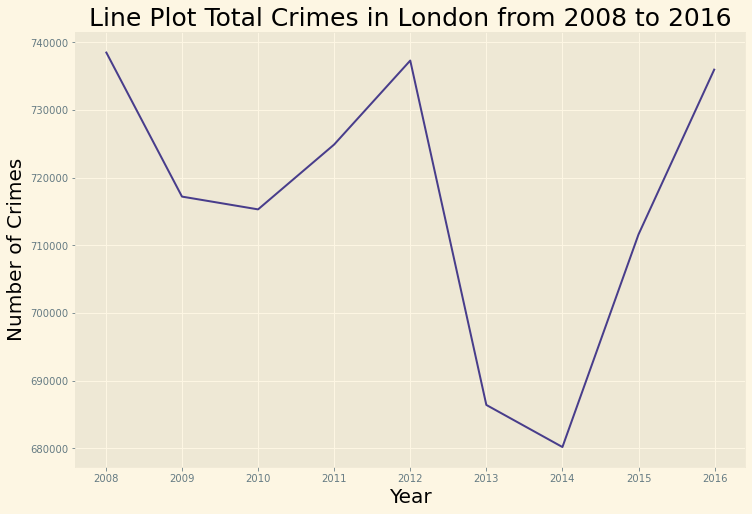

In [13]:
total_crimes.plot(kind='line', color='darkslateblue', figsize=(12,8))
plt.title('Line Plot Total Crimes in London from 2008 to 2016', fontsize=25)
plt.xlabel('Year', fontsize=20, color='black')
plt.ylabel('Number of Crimes', fontsize=20, color='black')
plt.show()

Dari line plot diatas diketahui bahwa total kriminalitas (crimes) yang terjadi di London sempat mengalami penurunan yang cukup signifikan pada tahun 2013, namun tingkat kriminalitas mengalami kenaikan lagi pada tahun 2016 yaitu menjadi total 736.121 kasus kriminal.

In [14]:
major_category_max = df.groupby(['major_category']).sum()

In [15]:
major_category_max.drop(columns=['year','month'], inplace=True)
major_category_max.sort_values(by='value', ascending=False)

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765
Robbery,258873
Other Notifiable Offences,106349
Fraud or Forgery,5325
Sexual Offences,1273


Dari tabel diatas diketahui kriminalitas yang paling banyak terjadi di london sepanjang tahun 2008-2016 adalah kriminalitas terkait Theft and Handling.

In [16]:
borough_max = df.groupby(['borough']).sum()

In [17]:
borough_max.drop(columns=['year','month'], inplace=True)
borough_max.sort_values(by='value', ascending=False)

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024
Croydon,260294
Ealing,251562
Islington,230286
Tower Hamlets,228613


Dari tabel diatas dapat diketahui bahwa 5 wilayah (borough) teratas di london yang paling banyak terjadi tingkat kriminalitas yaitu Westminster, Lambeth, Southwark, Camden, and Newham

In [18]:
# Filter Data untuk Membuat Area Chart
boroughs = ['Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham']
crime_type = 'Theft and Handling'
colors_borough = ['darkslateblue','green','yellow','blue','red']
df_filter = df[(df['major_category'] == crime_type) & (df['borough'].isin(boroughs))]

In [19]:
df_filter

,lsoa_code,borough,major_category,minor_category,value,year,month
21,E01004660,Westminster,Theft and Handling,Handling Stolen Goods,0,2012,2
38,E01003067,Lambeth,Theft and Handling,Handling Stolen Goods,0,2010,8
47,E01003064,Lambeth,Theft and Handling,Theft From Shops,0,2013,7
58,E01000893,Camden,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2012,9
64,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
...,...,...,...,...,...,...,...
13490534,E01003945,Southwark,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,7
13490545,E01004712,Westminster,Theft and Handling,Other Theft,17,2012,6
13490554,E01033576,Newham,Theft and Handling,Other Theft Person,0,2009,5
13490565,E01004742,Westminster,Theft and Handling,Theft/Taking of Pedal Cycle,0,2016,9


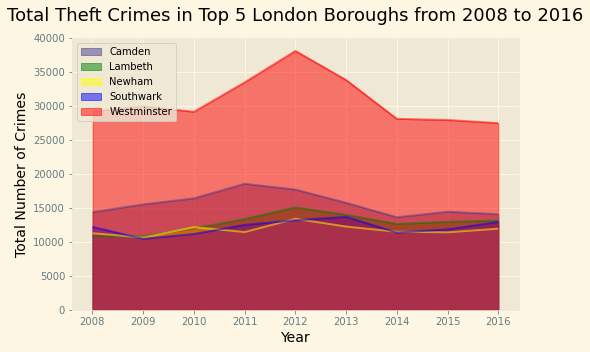

In [20]:
# Group data month dan borough kemudian sum jumlah kriminalitas (crimes) 
group = df_filter.groupby(['borough', 'year'])['value'].sum().reset_index()

# Pivot Data untuk membuat borough menjadi kolom
pivot = group.pivot(index='year', columns='borough', values='value')

# Membuat Area Chart
pivot.plot(kind='area', stacked=False, figsize=(8,5), alpha=0.5, color=colors_borough)

# Set titel dan label
plt.title('Total Theft Crimes in Top 5 London Boroughs from 2008 to 2016', y=1.04,fontsize=18)
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Total Number of Crimes', fontsize=14, color='black')
plt.legend(loc='upper left')
plt.show()

Dapat terlihat dari area chart diatas bahwa wilayah Westminster memiliki jumlah theft kriminalitas paling banyak dari wilayah lainnya.

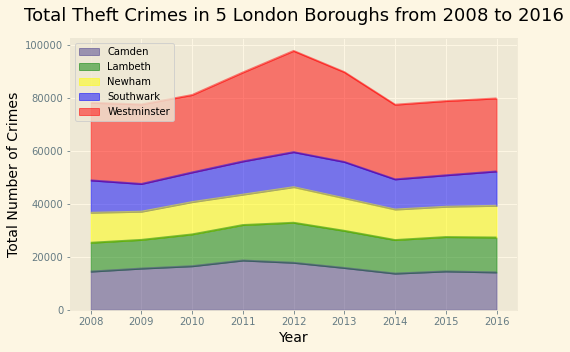

In [21]:
# Group data month dan borough kemudian sum jumlah kriminalitas (crimes) 
group = df_filter.groupby(['borough', 'year'])['value'].sum().reset_index()

# Pivot Data untuk membuat borough menjadi kolom
pivot = group.pivot(index='year', columns='borough', values='value')

# Membuat area chart
pivot.plot(kind='area', stacked=True, figsize=(8,5), alpha=0.5, color=colors_borough)

# Set titel dan label
plt.title('Total Theft Crimes in 5 London Boroughs from 2008 to 2016', y=1.04,fontsize=18)
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Total Number of Crimes', fontsize=14, color='black')
plt.legend(loc='upper left')
plt.show()

Berikut merupakan area chart stacked dari total theft crimes in 5 london boroughs dari tahun 2008 sampai 2016, terlihat bahwa Wersminster memiliki total kejahatan theft yang paling banyak.

In [22]:
pivot

borough,Camden,Lambeth,Newham,Southwark,Westminster
year,,,,,
2008,14394,10869,11295,12222,29266
2009,15537,10812,10632,10450,29967
2010,16425,11989,12184,11180,29191
2011,18573,13374,11464,12513,33529
2012,17717,15095,13416,13200,38152
2013,15767,13995,12271,13689,33868
2014,13640,12647,11499,11377,28144
2015,14455,12963,11421,11855,27980
2016,14088,13155,11964,12946,27520


In [23]:
count, bin_edges=np.histogram(pivot,15)

## Histogram

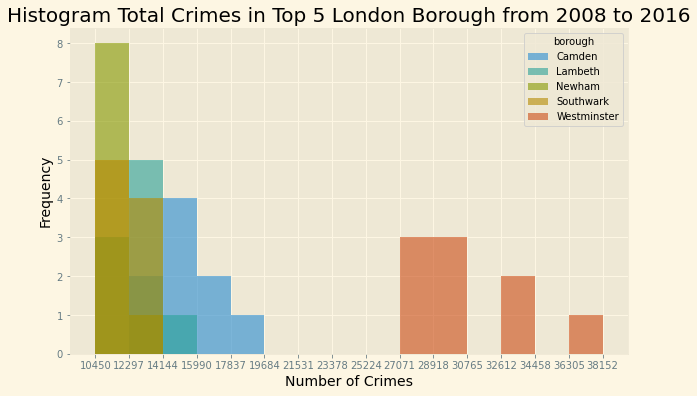

In [24]:
pivot.plot(kind='hist', figsize=(10,6), bins=15, alpha=0.6, xticks=bin_edges)
plt.title('Histogram Total Crimes in Top 5 London Borough from 2008 to 2016', fontsize=20, y=1.0)
plt.xlabel('Number of Crimes', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')
plt.show()

Terlihat dari histogram di atas menunjukkan persebaran data untuk top 5 wilayah di London yaitu Westminster, Southwark, Newham, Lambeth dan Camden dalam rentang tahun 2008-2016. Dapat dilihat data untuk kelima wilayah tersebut tidak tersebar secara merata karena datanya bertumpuk hanya terpusat atau tertumpuk di satu area range saja. Untuk data Southwark dapat diketahui bahwa ada sebanyak 8 data yang berada pada range 10450-12297 yang artinya di setiap tahun 2008 hingga 2016 angka kejahatan di kota tersebut berada dalam rentang 10450-12297. Hal yang sama juga ditunjukkan oleh data wilayah Camden untuk kota tersebut terletak pada range 12297-14144, dari histogram tersebut juga diketahui bahwa wilayah Westminster yang memiliki total kasus kejahatan terbanyak.

## Bar Chart Vertikal

In [25]:
westminster = pivot['Westminster']
westminster

year
2008    29266
2009    29967
2010    29191
2011    33529
2012    38152
2013    33868
2014    28144
2015    27980
2016    27520
Name: Westminster, dtype: int64

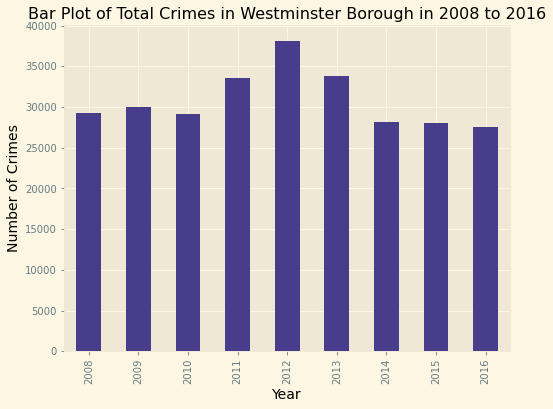

In [26]:
westminster.plot(kind='bar', figsize=(8,6), color='darkslateblue')
plt.title('Bar Plot of Total Crimes in Westminster Borough in 2008 to 2016')
plt.xlabel('Year', color='black', fontsize=14)
plt.ylabel('Number of Crimes', color='black', fontsize=14)
plt.show()

Dari Bar Plot wilayah Westminster pada tahun 2008 hingga tahun 2016 terlihat bahwa total crimes sempat melonjak pada tahun 2010-2012 hingga sejumlah 38.152 total crimes, namun pada tahun setelahnya mengalami penurunan lagi menjadi +- 30.000 total crimes

## Bar Chart Horizontal

In [27]:
borough_max.sort_values(by='value', ascending=True, inplace=True)
borough_max_top15 = borough_max['value'].tail(15)
borough_max_top15

borough
Hillingdon       209680
Barnet           212191
Haringey         213272
Lewisham         215137
Hackney          217119
Brent            227551
Tower Hamlets    228613
Islington        230286
Ealing           251562
Croydon          260294
Newham           262024
Camden           275147
Southwark        278809
Lambeth          292178
Westminster      455028
Name: value, dtype: int64

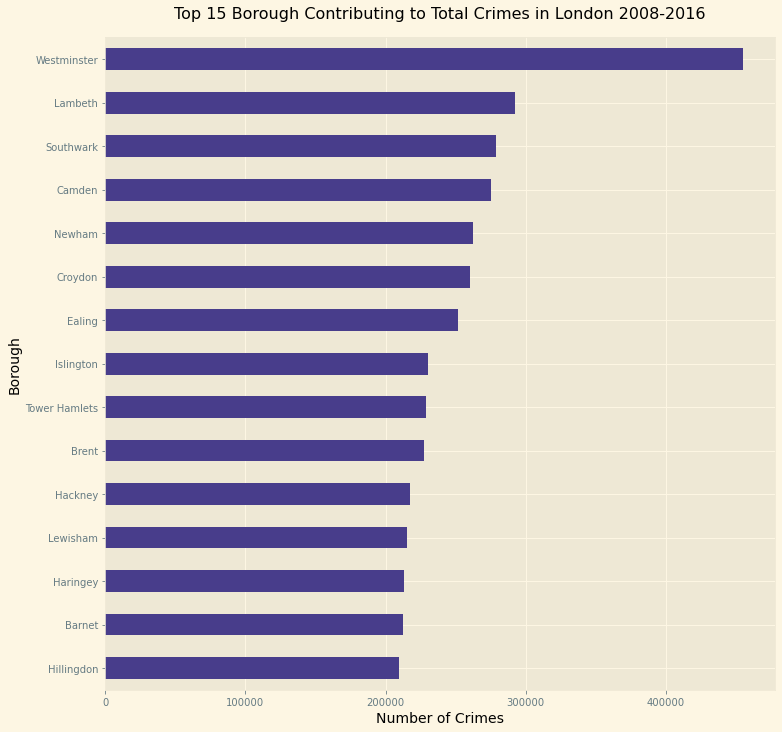

In [28]:
borough_max_top15.plot(kind='barh', figsize=(12,12), color='darkslateblue')
plt.xlabel('Number of Crimes', color='black', fontsize=14)
plt.ylabel('Borough', color='black', fontsize=14)
plt.title('Top 15 Borough Contributing to Total Crimes in London 2008-2016', y=1.02)
plt.show()

Dari bar chart horizontal diatas diketahui bahwa wilayah yang paling banyak menyumbah jumlah kriminalitas di london pada tahun 2008-2016 yaitu wilayah Westminster, disusul dengan wilayah Lambeth, dan lainnya.

# Pie Plot

In [29]:
colors_list=['yellow','darkslateblue','coral','gold','lightgreen','skyblue','brown','red','pink']
explode_list=[0,0,0.09,0.15,0.08,0.07,0.05,0.048,0]

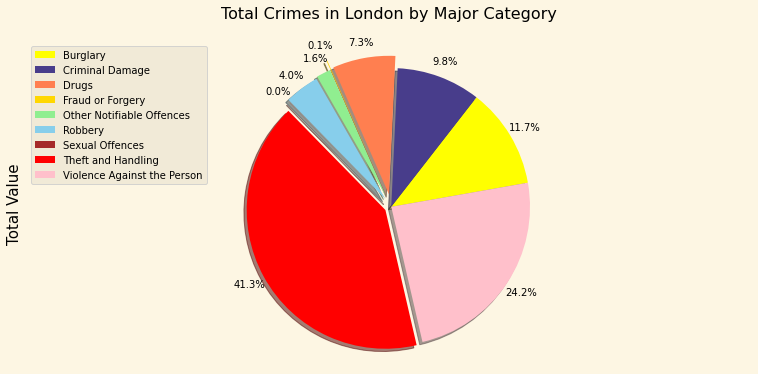

In [30]:
major_category_max['value'].plot(kind='pie',
                                figsize=(13,6),
                                autopct='%1.1f%%',
                                startangle=10,
                                colors=colors_list,
                                labels=None,
                                explode=explode_list,
                                pctdistance=1.12,
                                shadow=True)
plt.title('Total Crimes in London by Major Category', y=1.05)
plt.ylabel('Total Value', fontsize=15, color='black')
plt.legend(labels=major_category_max.index, loc='upper left')
plt.axis('equal')
plt.show()

Dari Pie Plot Total Crimes in London by Major Category diatas dapat diketahui bahwa kriminalitas yang paling banyak terjadi di London yaitu Theft and Handling sebesar 41,3% dengan total 2.661.861 kasus dan yang paling terendah yaitu Sexual Offences karena nilainya sangat kecil dibanding dengan Major Category yg lain maka persentasenya mendekati 0 dengan total kasus sebanyak 1273.

## Box Plot

In [31]:
pivot

borough,Camden,Lambeth,Newham,Southwark,Westminster
year,,,,,
2008,14394,10869,11295,12222,29266
2009,15537,10812,10632,10450,29967
2010,16425,11989,12184,11180,29191
2011,18573,13374,11464,12513,33529
2012,17717,15095,13416,13200,38152
2013,15767,13995,12271,13689,33868
2014,13640,12647,11499,11377,28144
2015,14455,12963,11421,11855,27980
2016,14088,13155,11964,12946,27520


In [32]:
pivot.describe()

borough,Camden,Lambeth,Newham,Southwark,Westminster
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,15621.777778,12766.555556,11794.000000,12159.111111,30846.333333
std,1692.698938,1393.246578,788.488427,1046.201277,3575.851472
min,13640.000000,10812.000000,10632.000000,10450.000000,27520.000000
25%,14394.000000,11989.000000,11421.000000,11377.000000,28144.000000
50%,15537.000000,12963.000000,11499.000000,12222.000000,29266.000000
75%,16425.000000,13374.000000,12184.000000,12946.000000,33529.000000
max,18573.000000,15095.000000,13416.000000,13689.000000,38152.000000


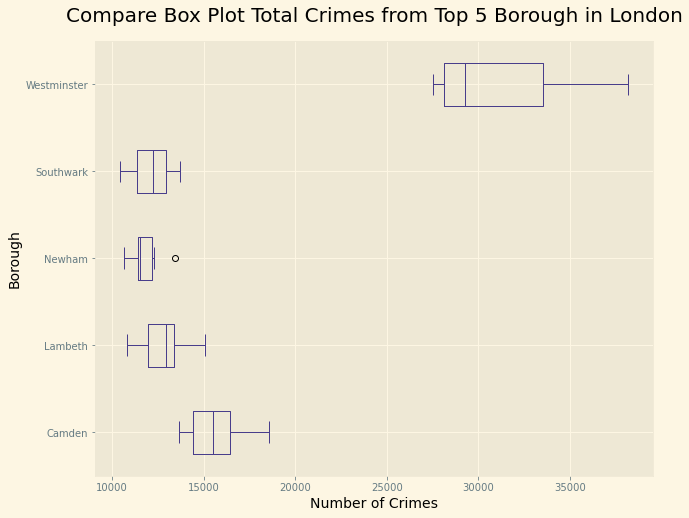

In [33]:
pivot.plot(kind='box', figsize=(10,8), vert=False, color='darkslateblue')
plt.title('Compare Box Plot Total Crimes from Top 5 Borough in London', fontsize=20, y=1.03)
plt.xlabel('Number of Crimes', fontsize=14, color='black')
plt.ylabel('Borough', fontsize=14, color='black')
plt.show()

Dari Box Plot total crimes dari top 5 wilayah di London, terlihat bahwa masing-masing wilayah tidak memiliki rata-rata atau mean yang seragam dengan yang lainnya, terlihat bahwa box plot dari 5 wilayah tersebut skewed ke kanan dan ke kiri, hanya wilayah Southwark dam Camden yang Skewednya hampir menuju normal, dan dari 5 wilayah tersebut terdapat pencilan pada wilayah Newham.

## Scatter Plot

In [34]:
total

,value,month
year,,
2008,738641,9743214
2009,717214,9743214
2010,715324,9743214
2011,724915,9743214
2012,737329,9743214
2013,686407,9743214
2014,680183,9743214
2015,711624,9743214
2016,736121,9743214


In [35]:
total.reset_index(inplace=True)

In [36]:
total

,year,value,month
0,2008,738641,9743214
1,2009,717214,9743214
2,2010,715324,9743214
3,2011,724915,9743214
4,2012,737329,9743214
5,2013,686407,9743214
6,2014,680183,9743214
7,2015,711624,9743214
8,2016,736121,9743214


In [37]:
total_month = df.groupby('month').sum()
total_month.drop(columns='year', inplace=True)
total_month.reset_index(inplace=True)

In [38]:
total_month

,month,value
0,1,530247
1,2,500537
2,3,551795
3,4,520648
4,5,552704
5,6,549041
6,7,563076
7,8,532784
8,9,522377
9,10,558252


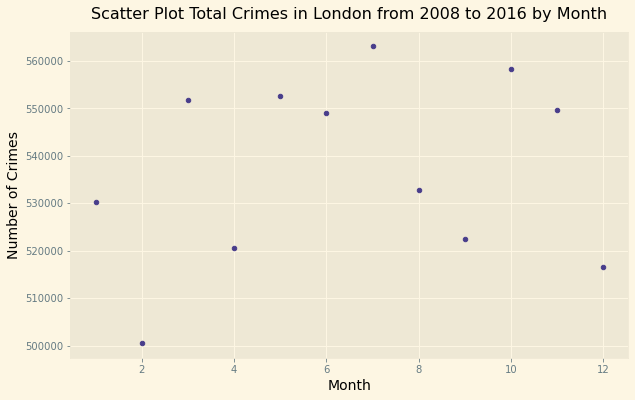

In [39]:
total_month.plot(kind='scatter', x='month',y='value', figsize=(10,6), color='darkslateblue')
plt.title('Scatter Plot Total Crimes in London from 2008 to 2016 by Month', y=1.02)
plt.xlabel('Month', color='black', fontsize=14)
plt.ylabel('Number of Crimes', color='black', fontsize=14)
plt.show()

Dari scatter plot diatas sumbu x mewakili periode perbulan dari data dan sumbu y mewakili jumlah kejahatan (crimes) yang terjadi di London pada tahun 2008 to 2016 terlihat bahwa tidak ada korelasi antar variabel.

## Word Clouds

In [ ]:
# Import Workcloud Libraries
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
text_london = " ".join(borough for borough in df['borough'])
stopwords = set(STOPWORDS)
# Load the London image to use as the wordcloud mask
england_mask = np.array(Image.open("england masking.png"))
# Create the wordcloud object
wc = WordCloud(background_color="white", max_words=1000, mask=england_mask, stopwords=stopwords, contour_width=3, contour_color='steelblue')
# Generate the wordcloud
wc.generate(text_london)
# Plot the wordcloud
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Terlihat dari hasil WordClouds diatas bahwa Waltham Forest dan Tower Hamlets Borough yang paling sering muncul pada kolom borough pada dataset.

## CHOROPLETH MAP

### PLOTLY

In [ ]:
borough_max

In [ ]:
borough_max.reset_index(inplace=True)

In [ ]:
import json
import plotly.express as px

In [ ]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [ ]:
london_boroughs = json.load(open("london_boroughs.json",'r'))

In [ ]:
london_boroughs['features'][1]['properties']

In [ ]:
london_id_map = {}
for feature in london_boroughs['features']:
    feature['id'] = feature['properties']['code']
    london_id_map[feature['properties']['name']] = feature['id']

In [ ]:
borough_max['id'] = borough_max['borough'].apply(lambda x: london_id_map[x])

In [ ]:
london_area_map= {}
for feature in london_boroughs['features']:
    feature['area'] = feature['properties']['area_hectares']
    london_area_map[feature['properties']['name']] = feature['area']

In [ ]:
borough_max['area'] = borough_max['borough'].apply(lambda x: london_area_map[x])

In [ ]:
borough_max.reset_index(inplace=True)

In [ ]:
fig = px.choropleth(borough_max, 
                    locations='id',
                    geojson=london_boroughs,
                    color='value',
                    hover_name='borough',
                    hover_data=['area'],
                    color_continuous_scale=px.colors.diverging.BrBG,
                    color_continuous_midpoint=0,)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

Berikut merupakan hasil dari Choropleth map dengan menggunakan Plotly terlihat bahwa Westminster merupakan Borough di London yang memiliki jumlah total kasus kejahatan terbesar pada tahun 2008-2016 dengan jumlah kasus sebanyak 455.028. Sehingga dapat disimpulkan bahwa Westminster menjadi borough yang tidak aman di London.

### FOLIUM

In [ ]:
import folium 
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import branca 
import seaborn as sns
import numpy as np

In [ ]:
borough_geo = json.load(open("london_boroughs.json",'r'))

In [ ]:
london_boroughs = folium.Map(location=[51.5085300, -0.1257400], zoom_start=8, tiles= 'CartoDB positron')

In [ ]:
london_boroughs

In [ ]:
folium.Choropleth(
    geo_data=borough_geo,
    name='choropleth',
    data=borough_max,
    key_on='feature.properties.code',
    columns=['id','value'],
    nan_fill_color='White',
    fill_opacity=0.7,
    line_opacity=0.9,
    legend_name='Total Crimes in London 2008-2016',
    fill_color = 'YlGnBu',
    line_color='black',
    line_weight=0.3,
    highlight=True
).add_to(london_boroughs)

london_boroughs

Dari hasil output Choropleth Map dengan menggunakan folium diatas terlihat bahwa Westminster merupakan borough yang paling banyak menyumbang kasus kejahatan di London pada tahun 2008-2016, sehingga menjadikan kota tersebut tidak aman.

**KESIMPULAN**

Dari hasil analisa diatas terkait data Crimes In London pada tahun 2008-2016 terlihat bahwa total kasus kejahatan di London sempat mengalami penurunan yang signifikan pada tahun 2012-2013, namun ditahun selanjutnya total kasus melonjak secara drastis hingga tahun 2016 (terlihat dari Line Plot) dengan total rata-rata kasus kejahatan di London dari tahun 2008-2016 yaitu sebesar 716.417 kasus. Terlihat juga dari hasil analisa bahwa major of category atau kejahatan yang paling banyak terjadi di London yaitu tindak kejahatan pencurian atau Theft and Handling (terlihat pada pie plot). Dan didapatkan juga borough yang paling banyak terjadi kasus kejahatan yaitu Westminster, sehingga menjadikan wilayah tersebut tidak aman. Sehingga disarankan untuk pihak kepolisian London untuk dapat lebih ketat dalam menjaga wilayah Westminster tersebut.